In [55]:
import spynnaker.pyNN as p
import numpy as np
from breakout_utils.dealing_with_neuron_ids import *
import matplotlib.pyplot as plt
from brian2 import *
%matplotlib inline
plt.viridis()

In [56]:
# Setup pyNN simulation
p.setup(timestep=1.0)

0

In [57]:
desired_frequency = 1. / (20 * ms)
print desired_frequency

50. Hz


In [58]:
# Parameters


weight_to_spike = 1.5
delay = 1 * ms
rate_delay = (1 / desired_frequency) - delay - (3 * ms)
run_time = 500*ms

print "delay", rate_delay

cell_params_lif = {'cm': 0.25,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 5.0,
                   'tau_syn_E': 5.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }


delay 16. ms


In [59]:
rate_pop = p.Population(1, p.IF_curr_exp, cell_params_lif)
p.Projection(rate_pop, rate_pop, p.OneToOneConnector(weight_to_spike, rate_delay/ms),target='excitatory', 
             label='rate_pop->rate_pop')

projection rate_pop->rate_pop

In [60]:
exc_times = {'spike_times': [0]}
inh_times = {'spike_times': []}
exc_p = p.Population(1, p.SpikeSourceArray, exc_times, label='exc_p')
inh_p = p.Population(1, p.SpikeSourceArray, inh_times, label='inh_p')

p.Projection(exc_p, rate_pop, p.OneToOneConnector(weight_to_spike, delay/ms),target='excitatory', 
             label='exc_p->rate_pop')
p.Projection(inh_p, rate_pop, p.OneToOneConnector(weight_to_spike, delay/ms), target='inhibitory', 
             label='inh_p->rate_pop')

projection inh_p->rate_pop

In [61]:
rate_pop.record_v()
rate_pop.record_gsyn()
rate_pop.record()

In [62]:
p.run(run_time/ms)

Allocating virtual identifiers
|0                           50%                         100%|
Partitioning graph vertices
|0                           50%                         100%|
Partitioning graph edges
|0                           50%                         100%|
Generating partitioner report
|0                           50%                         100%|
Filtering edges
|0                           50%                         100%|
Placing graph vertices
|0                           50%                         100%|
Generating placement report
|0                           50%                         100%|
Generating placement by core report
|0                           50%                         100%|
Generating SDRAM usage report
|0                           50%                         100%|
Routing
|0                           50%                         100%|
Allocating tags
|0                           50%                         100%|
Reporting Tags
|0                   

In [63]:
v_p1 = rate_pop.get_v(compatible_output=True)
gsyn_p1 = rate_pop.get_gsyn(compatible_output=True)
spikes_p1 = rate_pop.getSpikes(compatible_output=True)
p.end()

Getting membrane voltage for Population 0
|0                           50%                         100%|
Getting conductance for Population 0
|0                           50%                         100%|
Getting spikes for Population 0
|0                           50%                         100%|
Getting provenance data from machine graph
|0                           50%                         100%|
Getting provenance data
|0                           50%                         100%|
Getting Router Provenance
|0                           50%                         100%|
Extracting IOBUF
|0                           50%                         100%|


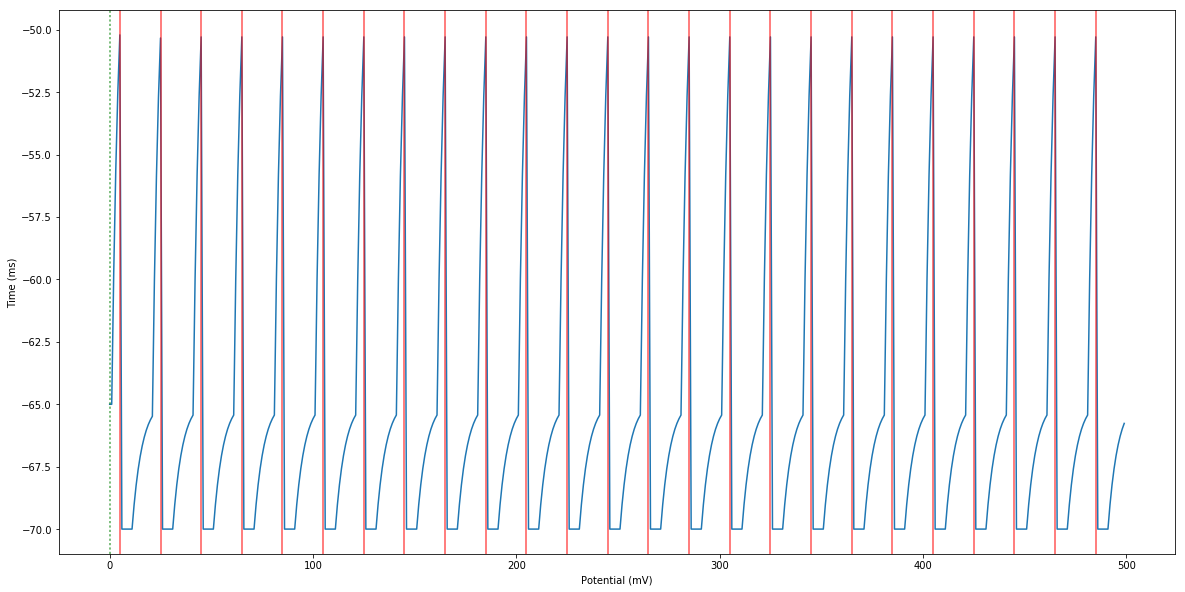

In [64]:
plt.figure(figsize=(20, 10))
plt.plot(v_p1[:, 2])
for input_t in exc_times['spike_times']:
    plt.axvline(input_t, ls=':', c='g', lw=2, alpha=.5)
for input_t in inh_times['spike_times']:
    plt.axvline(input_t, ls=':', c='y', lw=2, alpha=1)
for t in spikes_p1[:,1]:
    plt.axvline(t, ls='-', c='r', lw=2, alpha=.5)
plt.title("")
plt.xlabel("Potential (mV)")
plt.ylabel("Time (ms)")

In [65]:
actual_spike_times = spikes_p1[:,1]

In [66]:
print "Relative time between consecutive spikes", np.ediff1d(actual_spike_times)

Relative time between consecutive spikes [ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.]


In [67]:
actual_spike_times.size / run_time


50. * hertz